In [116]:
# EDA
# Profile of the data
# Statistical
# Graph analysis

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [117]:
import warnings
warnings.filterwarnings('ignore')

In [118]:
from google.colab import files
uploaded = files.upload()


Saving googleplaystore.csv to googleplaystore (1).csv


In [119]:
df = pd.read_csv('googleplaystore.csv')

In [120]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [121]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [122]:
df.shape

(10841, 13)

In [123]:
df.describe()   #Stats information for numerical data # Five Point summary

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


In [124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [125]:
df.duplicated().sum()

np.int64(483)

In [126]:
df = df.drop_duplicates()

In [127]:
df.shape

(10358, 13)

In [128]:
df.dtypes

,0
App,object
Category,object
Rating,float64
Reviews,object
Size,object
Installs,object
Type,object
Price,object
Content Rating,object
Genres,object


In [129]:
type(df.Reviews)

pandas.core.series.Series

In [130]:
df[~df.Reviews.str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [131]:
df_copy = df.copy()
df_copy

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [132]:
# Resetting the index as after dropping duplicate orginal index is still there
df_copy.reset_index(drop=True, inplace=True)

In [133]:
df_copy     # Made a shallow copy of the dataFrame

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10353,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10354,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10355,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10356,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [134]:
df_copy[~df_copy.Reviews.str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9990,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [135]:
df_copy = df_copy.drop(df_copy.index[9990])

In [136]:
df_copy[~df_copy.Reviews.str.isnumeric()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [137]:
df_copy['Reviews'].dtype

dtype('O')

In [138]:
df_copy['Reviews'] = df_copy['Reviews'].astype('int')
df_copy.Reviews.dtype

dtype('int64')

In [139]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10357 entries, 0 to 10357
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10357 non-null  object 
 1   Category        10357 non-null  object 
 2   Rating          8892 non-null   float64
 3   Reviews         10357 non-null  int64  
 4   Size            10357 non-null  object 
 5   Installs        10357 non-null  object 
 6   Type            10356 non-null  object 
 7   Price           10357 non-null  object 
 8   Content Rating  10357 non-null  object 
 9   Genres          10357 non-null  object 
 10  Last Updated    10357 non-null  object 
 11  Current Ver     10349 non-null  object 
 12  Android Ver     10355 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


In [140]:
df_copy['Size'].unique()

array(['19M', '14M', '8.7M', '25M', '2.8M', '5.6M', '29M', '33M', '3.1M',
       '28M', '12M', '20M', '21M', '37M', '2.7M', '5.5M', '17M', '39M',
       '31M', '4.2M', '7.0M', '23M', '6.0M', '6.1M', '4.6M', '9.2M',
       '5.2M', '11M', '24M', 'Varies with device', '9.4M', '15M', '10M',
       '1.2M', '26M', '8.0M', '7.9M', '56M', '57M', '35M', '54M', '201k',
       '3.6M', '5.7M', '8.6M', '2.4M', '27M', '2.5M', '16M', '3.4M',
       '8.9M', '3.9M', '2.9M', '38M', '32M', '5.4M', '18M', '1.1M',
       '2.2M', '4.5M', '9.8M', '52M', '9.0M', '6.7M', '30M', '2.6M',
       '7.1M', '3.7M', '22M', '7.4M', '6.4M', '3.2M', '8.2M', '9.9M',
       '4.9M', '9.5M', '5.0M', '5.9M', '13M', '73M', '6.8M', '3.5M',
       '4.0M', '2.3M', '7.2M', '2.1M', '42M', '7.3M', '9.1M', '55M',
       '23k', '6.5M', '1.5M', '7.5M', '51M', '41M', '48M', '8.5M', '46M',
       '8.3M', '4.3M', '4.7M', '3.3M', '40M', '7.8M', '8.8M', '6.6M',
       '5.1M', '61M', '66M', '79k', '8.4M', '118k', '44M', '695k', '1.6M',
     

As we know 1mb = 1024kb

In [141]:
item = '19M'
item[-1]  # Here we build a thought process how to remove the m in the string(item)

'M'

In [142]:
def size_process(item):
  if str(item)[-1] == 'M':
    res = float(str(item).replace('M', ''))
    res = res*1024
    return res
  elif str(item)[-1] == 'k':
    res = float(str(item).replace('k', ''))
    return res
  else:
    return str(np.nan)

In [143]:
df_copy['Size'] = df_copy['Size'].apply(size_process)

In [144]:
df_copy.Size.dtype

dtype('O')

In [145]:
df_copy.Size = df_copy.Size.astype('float')

In [146]:
df_copy.Size.dtype

dtype('float64')

In [147]:
df_copy['Installs'] # Here we can give , in python and also the + sign make the dtype into object

,Installs
0,"10,000+"
1,"500,000+"
2,"5,000,000+"
3,"50,000,000+"
4,"100,000+"
...,...
10353,"5,000+"
10354,100+
10355,"1,000+"
10356,"1,000+"


In [148]:
df_copy['Installs'].dtype

dtype('O')

In [149]:
df_copy['Installs'] = df_copy['Installs'].str.replace('+','').str.replace(',','')

In [150]:
df_copy['Installs'].astype(int)

,Installs
0,10000
1,500000
2,5000000
3,50000000
4,100000
...,...
10353,5000
10354,100
10355,1000
10356,1000


In [151]:
df_copy['Price']

,Price
0,0
1,0
2,0
3,0
4,0
...,...
10353,0
10354,0
10355,0
10356,0


In [152]:
df_copy['Price'].unique()   # here $ sign make the data object type

array(['0', '$4.99', '$3.99', '$6.99', '$1.49', '$2.99', '$7.99', '$5.99',
       '$3.49', '$1.99', '$9.99', '$7.49', '$0.99', '$9.00', '$5.49',
       '$10.00', '$24.99', '$11.99', '$79.99', '$16.99', '$14.99',
       '$1.00', '$29.99', '$12.99', '$2.49', '$10.99', '$1.50', '$19.99',
       '$15.99', '$33.99', '$74.99', '$39.99', '$3.95', '$4.49', '$1.70',
       '$8.99', '$2.00', '$3.88', '$25.99', '$399.99', '$17.99',
       '$400.00', '$3.02', '$1.76', '$4.84', '$4.77', '$1.61', '$2.50',
       '$1.59', '$6.49', '$1.29', '$5.00', '$13.99', '$299.99', '$379.99',
       '$37.99', '$18.99', '$389.99', '$19.90', '$8.49', '$1.75',
       '$14.00', '$4.85', '$46.99', '$109.99', '$154.99', '$3.08',
       '$2.59', '$4.80', '$1.96', '$19.40', '$3.90', '$4.59', '$15.46',
       '$3.04', '$4.29', '$2.60', '$3.28', '$4.60', '$28.99', '$2.95',
       '$2.90', '$1.97', '$200.00', '$89.99', '$2.56', '$30.99', '$3.61',
       '$394.99', '$1.26', '$1.20', '$1.04'], dtype=object)

In [153]:
char_to_remove = ['+',',','$']
cols_to_clean = ['Installs','Price']
for item in char_to_remove:
  for col in cols_to_clean:
    df_copy[col] = df_copy[col].str.replace(item,'')
# Here we make a generic code where it remove all the signs we reqired to remove for convertinf the datatype to int or float

In [154]:
df_copy.Price.unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [155]:
df_copy['Installs']=df_copy['Installs'].astype(int)
df_copy['Price']=df_copy['Price'].astype(float)

In [156]:
df_copy.dtypes

,0
App,object
Category,object
Rating,float64
Reviews,int64
Size,float64
Installs,int64
Type,object
Price,float64
Content Rating,object
Genres,object


In [157]:
df_copy['Last Updated']

,Last Updated
0,"January 7, 2018"
1,"January 15, 2018"
2,"August 1, 2018"
3,"June 8, 2018"
4,"June 20, 2018"
...,...
10353,"July 25, 2017"
10354,"July 6, 2018"
10355,"January 20, 2017"
10356,"January 19, 2015"


In [158]:
df_copy['Last Updated'] = pd.to_datetime(df_copy['Last Updated'])

In [159]:
df_copy['Last Updated']

,Last Updated
0,2018-01-07
1,2018-01-15
2,2018-08-01
3,2018-06-08
4,2018-06-20
...,...
10353,2017-07-25
10354,2018-07-06
10355,2017-01-20
10356,2015-01-19


In [160]:
df_copy['day'] = df_copy['Last Updated'].dt.day
df_copy['month'] = df_copy['Last Updated'].dt.month
df_copy['year'] = df_copy['Last Updated'].dt.year

In [161]:
df_copy.dtypes

,0
App,object
Category,object
Rating,float64
Reviews,int64
Size,float64
Installs,int64
Type,object
Price,float64
Content Rating,object
Genres,object


In [162]:
df_copy.drop('Last Updated', axis=1, inplace=True)

In [163]:
df_copy.dtypes

,0
App,object
Category,object
Rating,float64
Reviews,int64
Size,float64
Installs,int64
Type,object
Price,float64
Content Rating,object
Genres,object


In [164]:
df_copy['Android Ver'].unique()

array(['4.0.3 and up', '4.2 and up', '4.4 and up', '2.3 and up',
       '3.0 and up', '4.1 and up', '4.0 and up', '2.3.3 and up',
       'Varies with device', '2.2 and up', '5.0 and up', '6.0 and up',
       '1.6 and up', '1.5 and up', '2.1 and up', '7.0 and up',
       '5.1 and up', '4.3 and up', '4.0.3 - 7.1.1', '2.0 and up',
       '3.2 and up', '4.4W and up', '7.1 and up', '7.0 - 7.1.1',
       '8.0 and up', '5.0 - 8.0', '3.1 and up', '2.0.1 and up',
       '4.1 - 7.1.1', nan, '5.0 - 6.0', '1.0 and up', '2.2 - 7.1.1',
       '5.0 - 7.1.1'], dtype=object)

In [165]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [166]:
df_copy.App

,App
0,Photo Editor & Candy Camera & Grid & ScrapBook
1,Coloring book moana
2,"U Launcher Lite – FREE Live Cool Themes, Hide ..."
3,Sketch - Draw & Paint
4,Pixel Draw - Number Art Coloring Book
...,...
10353,Sya9a Maroc - FR
10354,Fr. Mike Schmitz Audio Teachings
10355,Parkinson Exercices FR
10356,The SCP Foundation DB fr nn5n


In [167]:
df[df.duplicated('App')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
285,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80804,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
293,OfficeSuite : Free Office + PDF Editor,BUSINESS,4.3,1002859,35M,"100,000,000+",Free,0,Everyone,Business,"August 2, 2018",9.7.14188,4.1 and up
294,Slack,BUSINESS,4.4,51510,Varies with device,"5,000,000+",Free,0,Everyone,Business,"August 2, 2018",Varies with device,Varies with device
382,Messenger – Text and Video Chat for Free,COMMUNICATION,4.0,56646578,Varies with device,"1,000,000,000+",Free,0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device
383,imo free video calls and chat,COMMUNICATION,4.3,4785988,11M,"500,000,000+",Free,0,Everyone,Communication,"June 8, 2018",9.8.000000010501,4.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10647,Motorola FM Radio,VIDEO_PLAYERS,3.9,54815,Varies with device,"100,000,000+",Free,0,Everyone,Video Players & Editors,"May 2, 2018",Varies with device,Varies with device
10715,FarmersOnly Dating,DATING,3.0,1145,1.4M,"100,000+",Free,0,Mature 17+,Dating,"February 25, 2016",2.2,4.0 and up
10720,Firefox Focus: The privacy browser,COMMUNICATION,4.4,36981,4.0M,"1,000,000+",Free,0,Everyone,Communication,"July 6, 2018",5.2,5.0 and up
10730,FP Notebook,MEDICAL,4.5,410,60M,"50,000+",Free,0,Everyone,Medical,"March 24, 2018",2.1.0.372,4.4 and up


In [168]:
df_copy = df_copy.drop_duplicates(subset=['App'],keep='first')

In [169]:
df_copy[df_copy.duplicated('App')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,day,month,year


In [170]:
df_copy.dtypes

,0
App,object
Category,object
Rating,float64
Reviews,int64
Size,float64
Installs,int64
Type,object
Price,float64
Content Rating,object
Genres,object


### EDA

In [171]:
categorical_features=[feature for feature in df_copy.columns if df_copy[feature].dtypes =='O']
# This will give us only categorical features in our dataset

In [172]:
numerical_features=[feature for feature in df_copy.columns if df_copy[feature].dtypes !='O']
numerical_features   # This will shoe the all numerical feature in our dataset

['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'day', 'month', 'year']

Categorical and numerical features are separated to ensure each is analyzed using methods tailored to its nature—preserving the integrity of insights drawn from both discrete labels and continuous values  

In [173]:
df_copy['Type'].value_counts()

,count
Type,
Free,8902
Paid,756


In [174]:
# If we want to check that in percentage
df_copy['Type'].value_counts(normalize=True)*100

,proportion
Type,
Free,92.172292
Paid,7.827708


In [175]:
for col in categorical_features:
  print(f"{col} : {df_copy[col].value_counts(normalize=True)*100}")

App : App
iHoroscope - 2018 Daily Horoscope & Astrology         0.010353
Photo Editor & Candy Camera & Grid & ScrapBook        0.010353
Coloring book moana                                   0.010353
U Launcher Lite – FREE Live Cool Themes, Hide Apps    0.010353
Sketch - Draw & Paint                                 0.010353
                                                        ...   
Learn To Draw Kawaii Characters                       0.010353
3D Color Pixel by Number - Sandbox Art Coloring       0.010353
Mandala Coloring Book                                 0.010353
Tattoo Name On My Photo Editor                        0.010353
Name Art Photo Editor - Focus n Filters               0.010353
Name: proportion, Length: 9659, dtype: float64
Category : Category
FAMILY                 18.966767
GAME                    9.928564
TOOLS                   8.561963
BUSINESS                4.348276
MEDICAL                 4.089450
PERSONALIZATION         3.892743
PRODUCTIVITY            3.872036

### Categorical  Features Analysis

In [176]:
df_copy['Content Rating'].value_counts(normalize=True)*100

,proportion
Content Rating,
Everyone,81.820064
Teen,10.725748
Mature 17+,4.068744
Everyone 10+,3.333678
Adults only 18+,0.031059
Unrated,0.020706


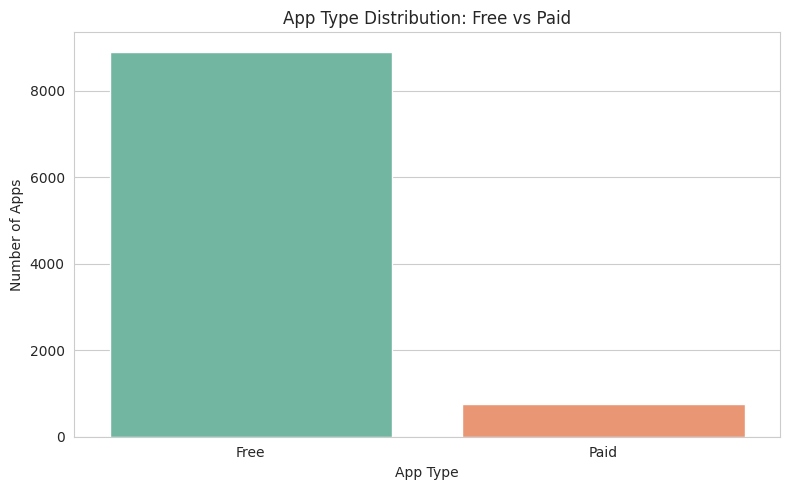

In [177]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))  # Slightly wider for better spacing
sns.set_style("whitegrid")  # Cleaner background

# Sorted order (optional, but useful if more than 2 categories)
order = df_copy['Type'].value_counts().index

ax = sns.countplot(x='Type', data=df_copy, order=order, palette='Set2')

plt.title('App Type Distribution: Free vs Paid')
plt.xlabel('App Type')
plt.ylabel('Number of Apps')
plt.tight_layout()
plt.show()


Insight: An overwhelming 92% of apps on the Google Play Store are free, highlighting a dominant freemium model in the mobile app ecosystem. This suggests that developers largely rely on alternative monetization strategies such as ads, in-app purchases, or subscriptions rather than upfront pricing. The relatively small share of paid apps (just under 8%) reflects user preference for free access and the competitive pressure to offer value before charging.

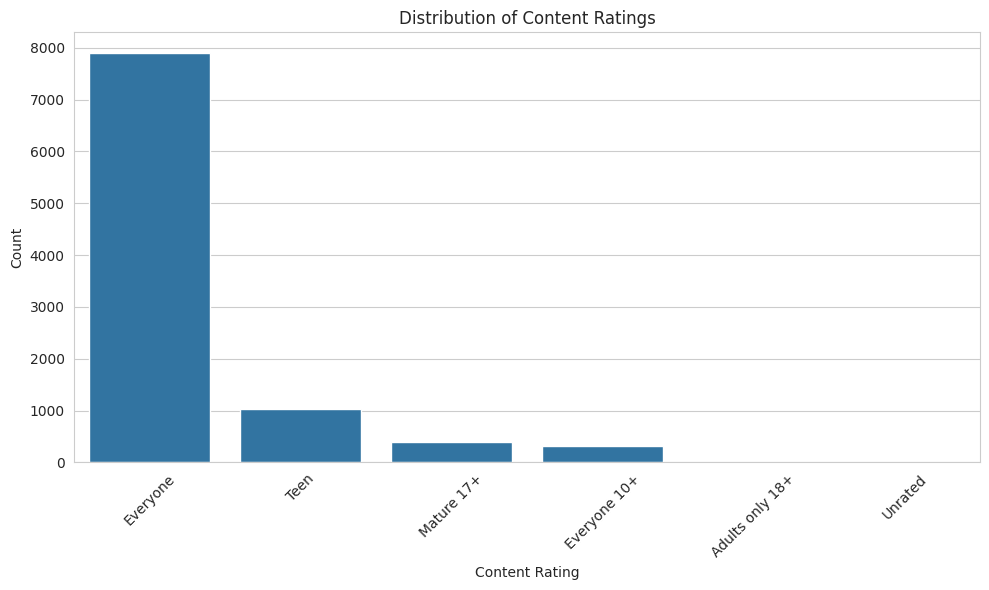

In [178]:
plt.figure(figsize=(10, 6))  # Adjust width and height as needed
order = df_copy['Content Rating'].value_counts().index
sns.countplot(x='Content Rating', data=df_copy, order=order)
plt.title('Distribution of Content Ratings')
plt.xlabel('Content Rating')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Optional: rotate labels for readability
plt.tight_layout()
plt.show()

Insight: The vast majority of apps on the Google Play Store are rated for universal accessibility, with over 80% categorized under "Everyone". This suggests that developers prioritize broad audience reach, likely aiming for maximum downloads and inclusivity. In contrast, age-restricted categories like "Adults only 18+" and "Unrated" make up less than 0.1%, indicating minimal presence of mature or ambiguous content.

### Numerica Features Analysis

In [179]:
numerical_features

['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'day', 'month', 'year']

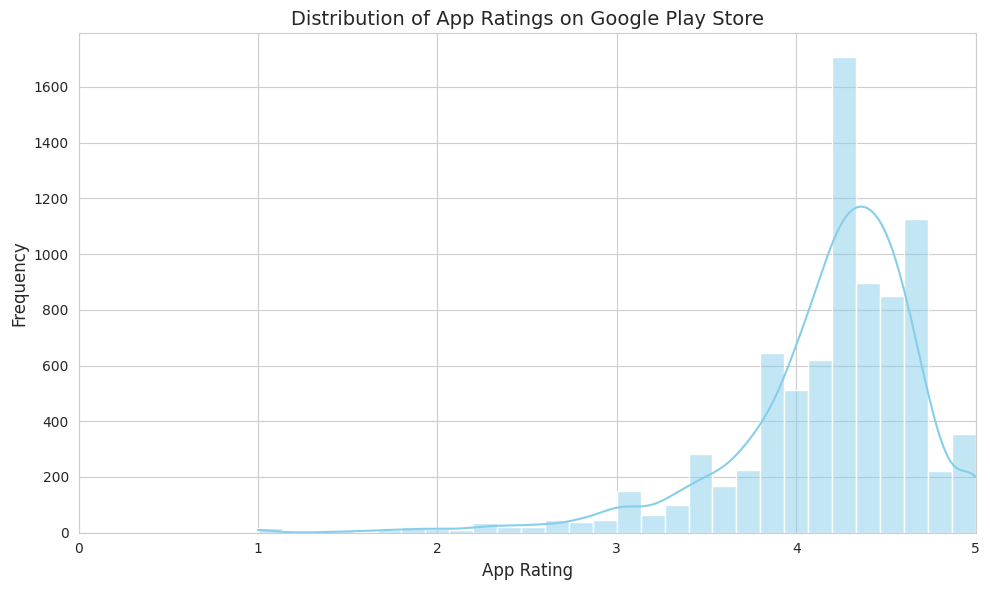

In [180]:
sns.set_style("whitegrid")  # Clean background
plt.figure(figsize=(10, 6))  # Wider layout for clarity

# Distribution plot with KDE curve
sns.histplot(data=df_copy, x='Rating', kde=True, bins=30, color='skyblue')

plt.title('Distribution of App Ratings on Google Play Store', fontsize=14)
plt.xlabel('App Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xlim(0, 5)  # Ratings range from 0 to 5
plt.tight_layout()
plt.show()


Insight: Distribution of App Ratings :-
 The distribution of app ratings on the Google Play Store is left-skewed (negatively skewed), with a strong concentration of ratings between 4.0 and 4.7. The KDE curve peaks around 4.3, indicating that most apps are rated favorably by users. Ratings below 3.0 are relatively rare, suggesting that poorly rated apps are either less common or less likely to remain on the platform.

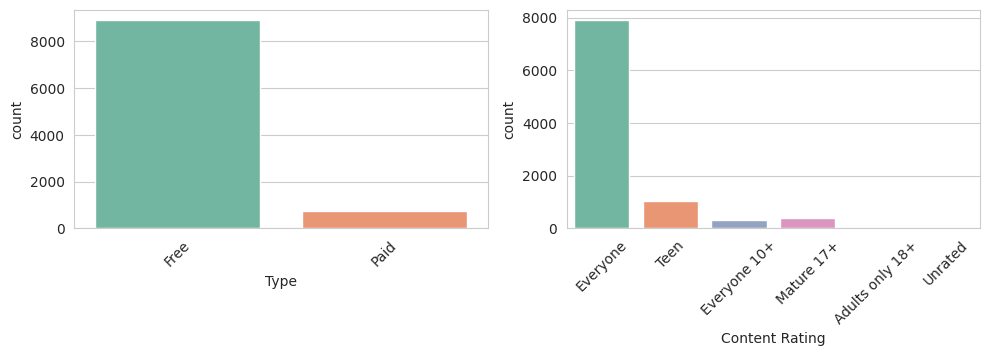

In [181]:
plt.figure(figsize=(10, 6))  # Wider layout for clarity

category = ['Type', 'Content Rating']

for i in range(0,len(category)):
  plt.subplot(2,2,i+1)
  sns.countplot(x=category[i], data=df_copy , palette = 'Set2')
  plt.xlabel(category[i])
  plt.xticks(rotation=45)
  plt.tight_layout()
plt.tight_layout()
plt.show()

**Insight: App Type and Content Rating Distribution :-**
The Google Play Store is overwhelmingly dominated by free apps, which account for over 92% of the total offerings. This reflects the prevalence of the freemium model, where developers monetize through ads, in-app purchases, or subscriptions rather than upfront pricing. The small share of paid apps (under 8%) suggests that users prefer free access and that developers face pressure to demonstrate value before charging.

In terms of content rating, more than 80% of apps are labeled “Everyone”, indicating a strong emphasis on universal accessibility. This trend highlights developers’ intent to maximize reach and downloads by targeting the broadest possible audience. Age-restricted categories like “Adults only 18+” and “Unrated” are extremely rare, comprising less than 0.1%, which suggests minimal presence of mature or ambiguous content on the platform.

In [182]:
#Q which category is most popular category in the app ?


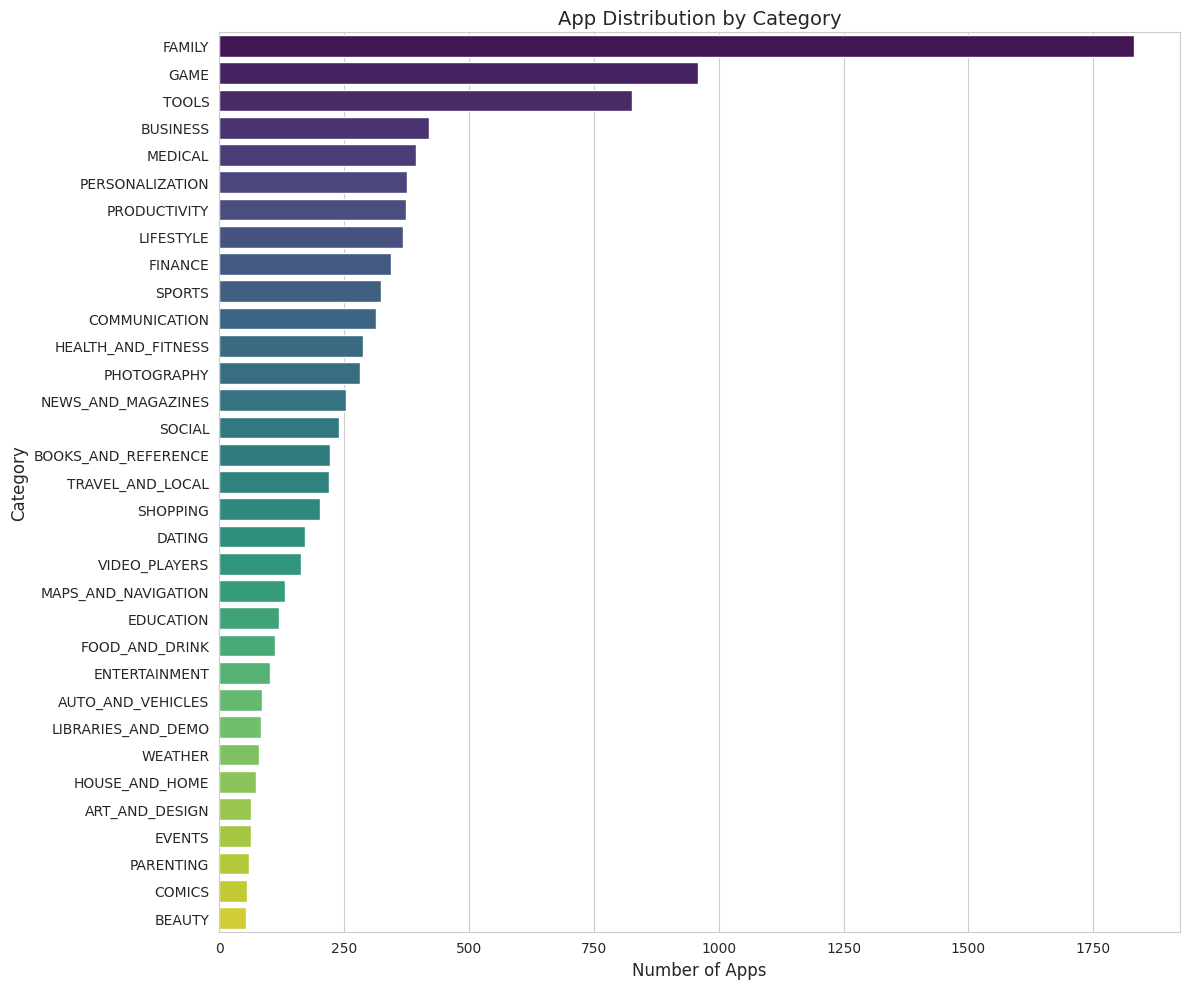

In [183]:
plt.figure(figsize=(12, 10))  # Adjust height for long category list
sns.set_style("whitegrid")

# Get sorted category counts
category_counts = df_copy['Category'].value_counts()

# Plot horizontal bar chart
sns.barplot(y=category_counts.index, x=category_counts.values, palette='viridis')

plt.title('App Distribution by Category', fontsize=14)
plt.xlabel('Number of Apps', fontsize=12)
plt.ylabel('Category', fontsize=12)
plt.tight_layout()
plt.show()

📊 Insight: App Category Dominance and Strategic Implications

The FAMILY category overwhelmingly leads the Google Play Store, accounting for nearly 19% of all apps, followed by GAME and TOOLS. This distribution reveals a strong developer focus on entertainment and utility, catering to broad user bases including children, casual gamers, and everyday smartphone users.

Strategic Takeaways:

📱 FAMILY apps likely benefit from high engagement across age groups, especially in educational and entertainment subgenres. Developers may prioritize this category for its viral potential and monetization via ads or in-app purchases.

🎮 GAME apps, while second in volume, often dominate in install counts and user reviews—suggesting high competition and the need for standout design or unique gameplay to succeed.

🛠️ TOOLS reflect demand for productivity and device enhancement, indicating user interest in functionality over entertainment.

In [184]:
# FMILY IS IS THE MOST POPULAR CATEGORY WITH 19% OF SHARE

In [185]:
#Q what is the top 10 important category
cat = df_copy['Category'].value_counts().head(10)[:10]

In [186]:
category = cat.reset_index()

In [187]:
category.columns = ['Groups','count']

In [188]:
category

,Groups,count
0,FAMILY,1832
1,GAME,959
2,TOOLS,827
3,BUSINESS,420
4,MEDICAL,395
5,PERSONALIZATION,376
6,PRODUCTIVITY,374
7,LIFESTYLE,369
8,FINANCE,345
9,SPORTS,325


<Axes: xlabel='Groups', ylabel='count'>

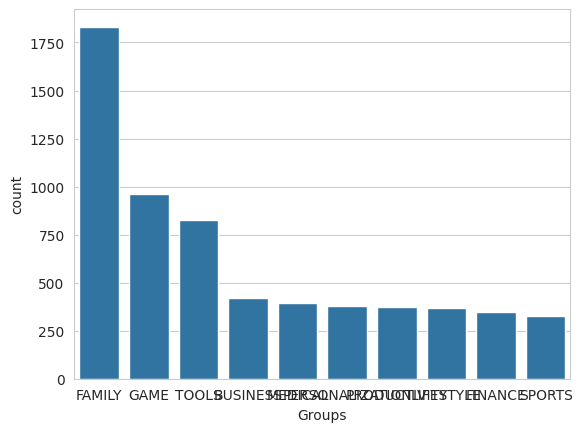

In [189]:
sns.barplot(category, x = 'Groups', y = 'count')

In [190]:
!pip install squarify


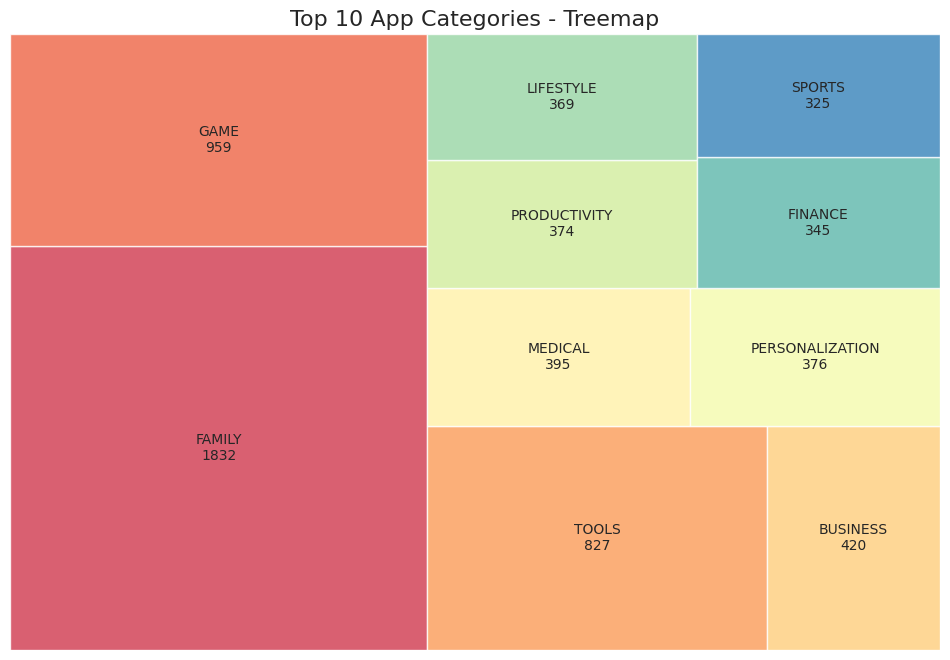

In [191]:
import squarify
# Prepare data
labels = [f"{grp}\n{cnt}" for grp, cnt in zip(category['Groups'], category['count'])]
sizes = category['count'].values

# Plot treemap
plt.figure(figsize=(12, 8))
squarify.plot(sizes=sizes, label=labels, alpha=0.8, color=sns.color_palette("Spectral", len(sizes)))
plt.title("Top 10 App Categories - Treemap", fontsize=16)
plt.axis('off')
plt.show()

The treemap reveals a visually intuitive hierarchy among the top 10 app categories. The FAMILY category dominates the space, reinforcing its position as the most saturated segment in the Play Store. Its large block size reflects nearly 19% of all apps, suggesting that developers heavily target family-friendly content—likely due to its broad appeal across age groups and potential for high engagement.

Other sizable blocks like GAME, TOOLS, and BUSINESS indicate strong developer interest in entertainment, utility, and productivity. In contrast, smaller blocks such as MEDICAL and PERSONALIZATION suggest niche markets with more specialized audiences.

In [192]:
# Which category has highest installation


In [193]:
df_copy.groupby(['Category'])['Installs'].sum().sort_values(ascending=False).reset_index()

,Category,Installs
0,GAME,13878924415
1,COMMUNICATION,11038276251
2,TOOLS,8001771915
3,PRODUCTIVITY,5793091369
4,SOCIAL,5487867902
5,PHOTOGRAPHY,4649147655
6,FAMILY,4427941505
7,VIDEO_PLAYERS,3926902720
8,TRAVEL_AND_LOCAL,2894887146
9,NEWS_AND_MAGAZINES,2369217760


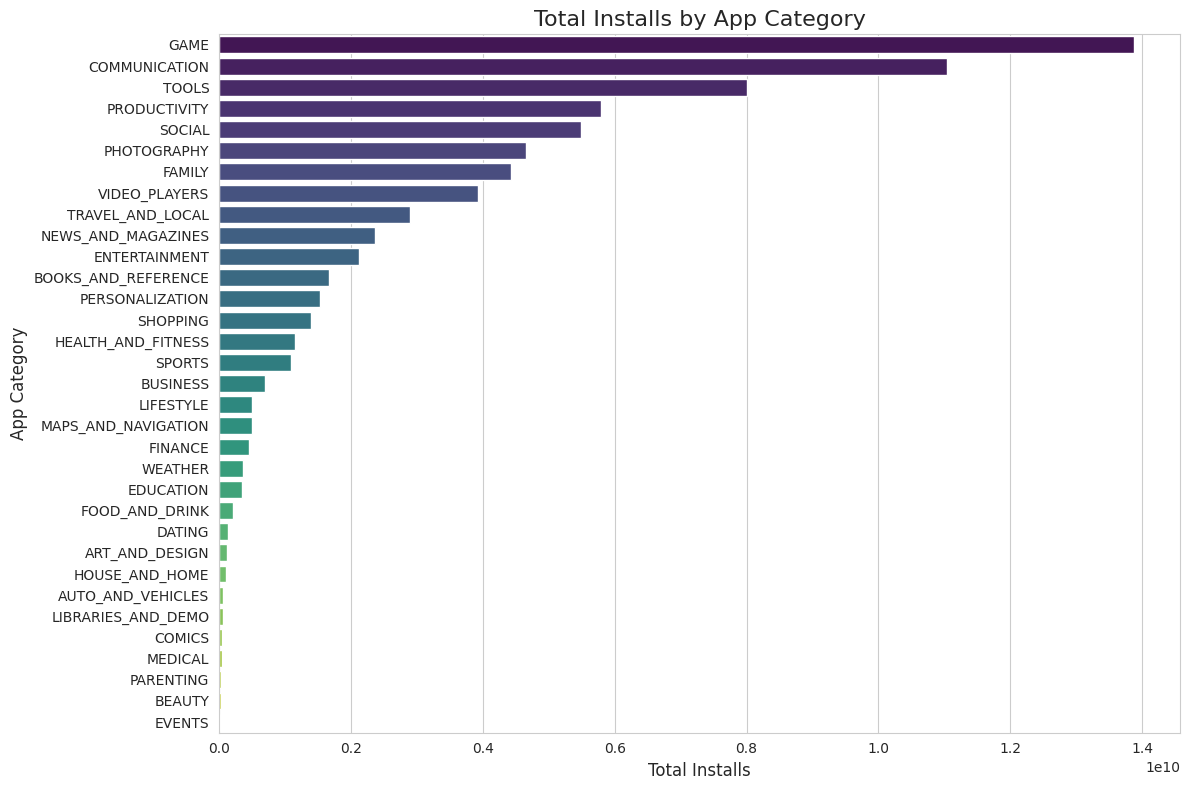

In [194]:
# Plot
plt.figure(figsize=(12, 8))
sns.set_style("whitegrid")
sns.barplot(y='Category', x='Installs', data=category_installs, palette='viridis')

# Customize
plt.title('Total Installs by App Category', fontsize=16)
plt.xlabel('Total Installs', fontsize=12)
plt.ylabel('App Category', fontsize=12)
plt.tight_layout()
plt.show()


The GAME category leads in total installs across the Play Store, surpassing all other categories by a significant margin

In [195]:
# Q Which category app users are reviewing the most

In [196]:
# Aggregate total reviews by category
category_reviews = df_copy.groupby('Category')['Reviews'].sum().sort_values(ascending=False).reset_index()
category_reviews

,Category,Reviews
0,GAME,622298709
1,COMMUNICATION,285811368
2,TOOLS,229356578
3,SOCIAL,227927801
4,FAMILY,143825488
5,PHOTOGRAPHY,105351270
6,VIDEO_PLAYERS,67484568
7,PRODUCTIVITY,55590649
8,PERSONALIZATION,53543080
9,SHOPPING,44551730


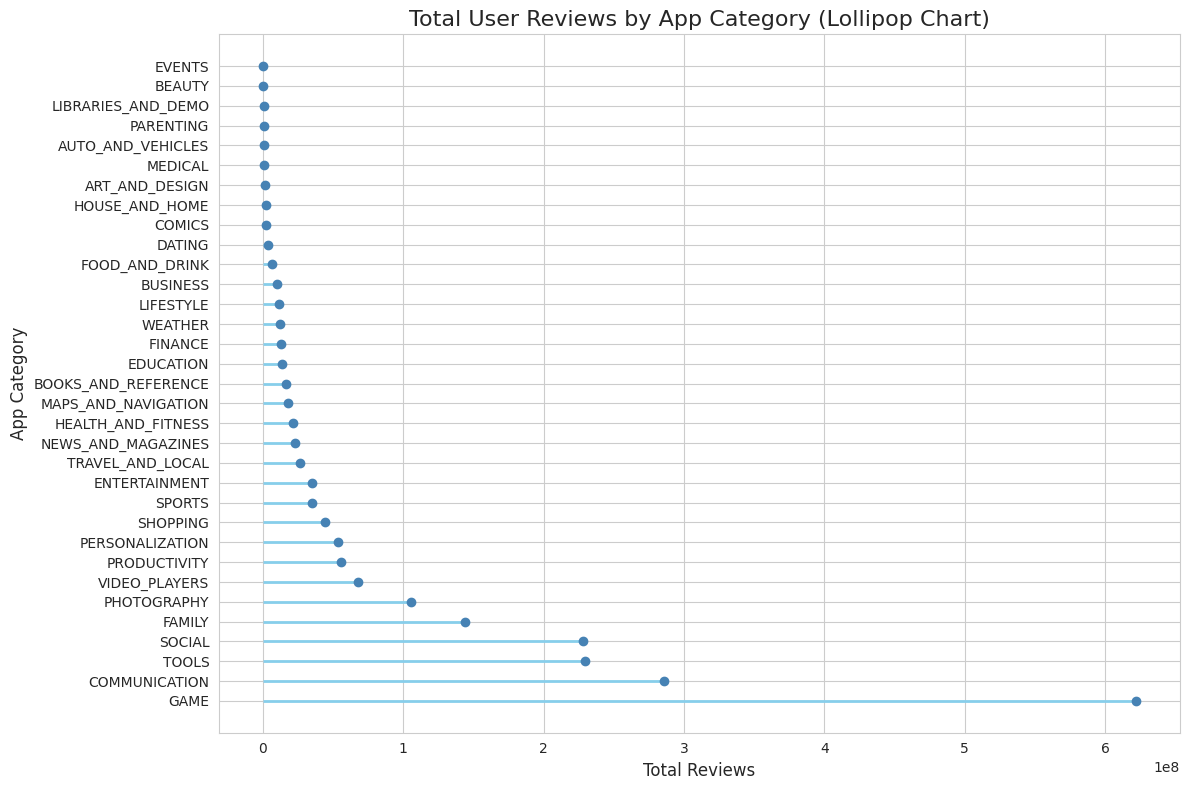

In [197]:
# Plot
plt.figure(figsize=(12, 8))
plt.hlines(y=category_reviews['Category'], xmin=0, xmax=category_reviews['Reviews'], color='skyblue', linewidth=2)
plt.plot(category_reviews['Reviews'], category_reviews['Category'], "o", color='steelblue')

# Customize
plt.title('Total User Reviews by App Category (Lollipop Chart)', fontsize=16)
plt.xlabel('Total Reviews', fontsize=12)
plt.ylabel('App Category', fontsize=12)
plt.tight_layout()
plt.show()


🥇 GAME is the clear leader, with the longest line and largest dot, showing it receives the most user reviews.

📢 COMMUNICATION and SOCIAL follow closely, reflecting high user interaction and feedback.

🧘 Categories like HEALTH_AND_FITNESS and PRODUCTIVITY show moderate engagement.

🧪 Niche categories like MEDICAL and LIBRARIES_AND_DEMO have minimal review activity.

**Why GAME Dominates Reviews**

High engagement: Users spend more time in games, leading to stronger emotional reactions—both positive and negative.

Frequent updates: Game developers often push updates, prompting users to leave fresh reviews.

Competitive nature: Players are vocal about bugs, balance issues, and gameplay features.

Why This Chart Works?

Minimalist design makes it easy to compare categories.

Dot + line combo adds visual interest without clutter.

Sorted layout ensures the top categories stand out instantly